In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy as sc
from scipy import  asarray as ar,exp
from  scipy import stats
from scipy.stats import norm
import math
from pylab import meshgrid, imshow, cm, contour,clabel,colorbar,axis,title,show
import pickle
import pandas as pd
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

%matplotlib inline

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function OK
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

x minimum =  0.0 
 y minimum =  0.0


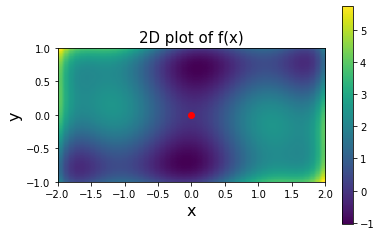

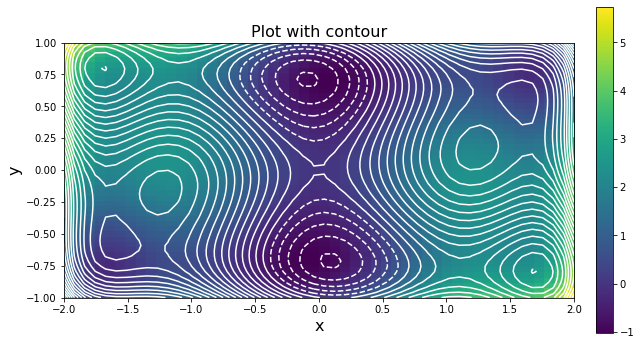

There are 6 local minima (+ the saddle point). I want to find the absolute minima of the function.

By using Nelder-Mead method, the minima are [ 0.08986599 -0.71268205] , [-0.08986599  0.71268205]
By using Powell method, the minima are [ 0.09003343 -0.7129541 ] , [ 0.08984201 -0.71265645]
By using CG method, the minima are [-0.08984194  0.71265633] , [ 0.08984194 -0.71265633]
By using BFGS method, the minima are [-0.08984197  0.71265633] , [ 0.08984197 -0.71265633]
By using L-BFGS-B method, the minima are [-0.08984151  0.71265878] , [ 0.08984151 -0.71265878]
By using TNC method, the minima are [-0.08984111  0.71265545] , [ 0.08984111 -0.71265545]
By using COBYLA method, the minima are [ 0.08986837 -0.71259151] , [ 0.08986814 -0.71273786]
By using SLSQP method, the minima are [ 0.08986696 -0.71267079] , [-0.08986696  0.71267079]
[-0.08984201  0.71265639]
[ 0.08984201 -0.71265639]
[-1.7036067   0.79608358]
[ 1.7036067  -0.79608358]
[-0.08984201  0.71265638]
[-1.7036067   0.79608358]

 T

In [4]:
#defining the function
def f(x):
    return (4-2.1*x[0]**2 + x[0]**4/3)*x[0]**2 + x[0]*x[1] + (4*x[1]**2-4)*x[1]**2

x = np.linspace(-2,2)
y = np.linspace(-1,1)

X,Y = np.meshgrid(x,y) # grid of point

#searching for the minimum with initial guess x0=(0,0)
solution = sc.optimize.minimize(f, x0 = [0,0])
print('x minimum = ',solution.x[0], '\n y minimum = ',solution.x[1])

#Creating and plotting 2D plot
plt.imshow(f([X,Y]), extent=[-2,2,-1,1])
plt.title("2D plot of f(x)", fontsize=15)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.colorbar()

#Plotting the mimimum found
plt.scatter(solution.x[0], solution.x[1], color='red')
plt.show()


#plot with contour to help localizing minimum
F = f([X, Y])
plt.figure(figsize=(10,6))
fig2 = plt.imshow(F,extent=[-2, 2, -1, 1])
heights = np.arange(-2, 7, 0.2)
plt.colorbar(fig2, fraction=0.046, pad=0.04)

plt.contour(X, Y, F, levels=heights, colors='white')
plt.title('Plot with contour',fontsize=16)
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.show()



print('There are 6 local minima (+ the saddle point). I want to find the absolute minima of the function.\n')

#setting initial guess looking at the figure
x0 = [-1,-1]
x1 = [1,1]

#listing all possible methods
methods = ['Nelder-Mead', 'Powell','CG', 'BFGS' ,'L-BFGS-B', 'TNC', 'COBYLA' , 'SLSQP']

#using all possible methods
for i in methods:
    print('By using',i,'method, the minima are',sc.optimize.minimize(f, x0, method = i).x,',',sc.optimize.minimize(f, x1, method = i).x)




#finding function value in all the minima to check wether the previous ones found are the absolute ones
def findMinima(f,x0):
    return sc.optimize.minimize(f, x0) 

#By looking at the figure we can guess the initial points to use in order to find the minima
x0 = [[0.,0.7],[0.,-0.7],[-1.8,0.8],[1.8,-0.8],[1.8,0.8],[-1.8,0.8]]

#used to store min value and compare 
minimum1 , minimum2, fMin = 0,0,0
#looping over initial points given
for x in x0:
    solution = findMinima(f,x)
    print(solution.x)
    if (f(solution.x)<fMin):
        minimum1 = solution.x
        minimum2 = -minimum1
        fMin = f(solution.x)
        
print('\n The two absolute minima, where the function value is',fMin, 'are:\n',minimum1,',', minimum2)


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures. OK
* Find a suitable a function that can describe min and max temperatures. OK
* Fit this function to the data with `scipy.optimize.curve_fit()`. OK
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

My data could be fitted by a gaussian looking at their behaviour
Centroid of min temperatures fit: 7.164525950679975 
Centroid of max temperatures fit: 6.735815371331638
λ = 4.638125325802089 : results are not compatible.


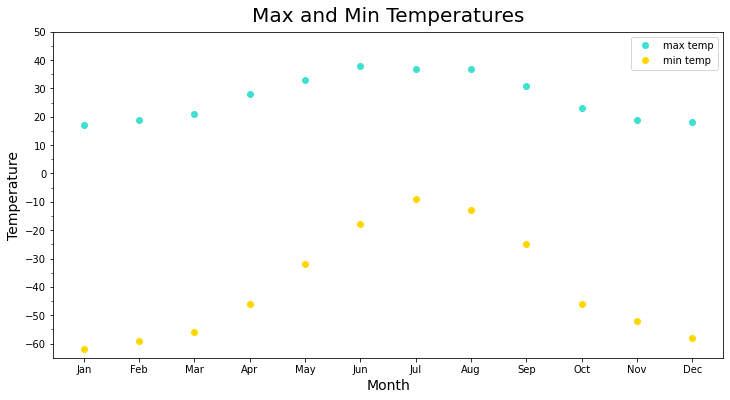

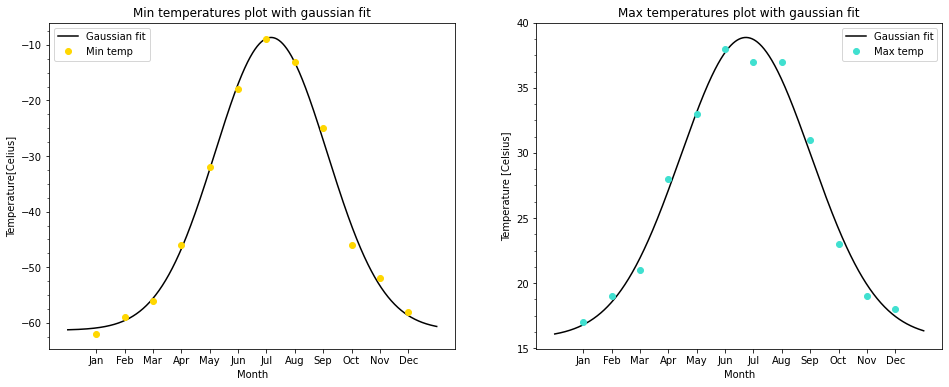

In [17]:
#array with my data
maxim = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
minim = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
month = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
m = [1,2,3,4,5,6,7,8,9,10,11,12]

#plotting data
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(month, maxim, 'o', ms = 6, label ='max temp', color = 'turquoise')
ax.plot(month, minim, 'o', ms = 6, label ='min temp', color = 'gold')
ax.set_ylim(-65, 50)
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.set_xlabel("Month", fontsize = 14)
ax.set_ylabel("Temperature", fontsize = 14)
ax.set_title("Max and Min Temperatures", fontsize=20, verticalalignment='bottom')

plt.legend()

print("My data could be fitted by a gaussian looking at their behaviour")

#function to fit with
def func(x, a, b, c, N):
    return a * np.exp(-(x-b)**2/(2*c**2))+N

#parameters of my  fit
fitMin, covMin = sc.optimize.curve_fit(f = func, xdata = m, ydata = minim)
fitMax, covMax = sc.optimize.curve_fit(f = func, xdata = m, ydata = maxim)

fig, ax = plt.subplots(nrows=1, ncols=2, sharex='row', figsize=(16,6))

#set titles and labels
ax[0].set_title('Min temperatures plot with gaussian fit')
ax[1].set_title('Max temperatures plot with gaussian fit')

ax[0].set_xlabel('Month')
ax[0].set_ylabel('Temperature[Celius]')

ax[1].set_xlabel('Month')
ax[1].set_ylabel('Temperature [Celsius]')

#use this binning to have a better gaussian 
binning = np.linspace(0, 13, 1000)

ax[0].plot(binning,func(binning,*fitMin), label = 'Gaussian fit', linestyle = '-', color = 'black')
ax[0].plot(m,minim, marker = 'o', linestyle='', label = 'Min temp', color = 'gold')
ax[0].set_xticks(1+np.arange(len(month)))
ax[0].set_xticklabels(month)
ax[0].yaxis.set_minor_locator(AutoMinorLocator(4))

ax[1].plot(binning,func(binning,*fitMax), label = 'Gaussian fit',linestyle = '-', color = 'black')
ax[1].plot(m,maxim, marker = 'o', linestyle='', label = 'Max temp', color ='turquoise')
ax[1].set_xticks(1+np.arange(len(month)))
ax[1].set_xticklabels(month)
ax[1].yaxis.set_minor_locator(AutoMinorLocator(4))

ax[0].legend(loc = 'upper left')
ax[1].legend(loc = 'upper right')


plt.legend()

plt.plot()

#printing the 2 offsets
print('Centroid of min temperatures fit:',fitMin[1],'\nCentroid of max temperatures fit:',fitMax[1])


# compute lambda 
compatibility = abs(fitMin[1]-fitMax[1])/(np.sqrt(np.sqrt(np.diag(covMin))[1]**2+np.sqrt(np.diag(covMax))[1]**2))
print('λ =',compatibility, ': results are not compatible.')

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it. OK
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin) OK
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

Looking at the data, I can fit them with a gaussian

 The parameters of the fit are: 
 mu = -0.08989199615591523 
 sigma = 0.2345427722371009


Text(0.5, 1.0, 'Residuals of the gaussian fit')

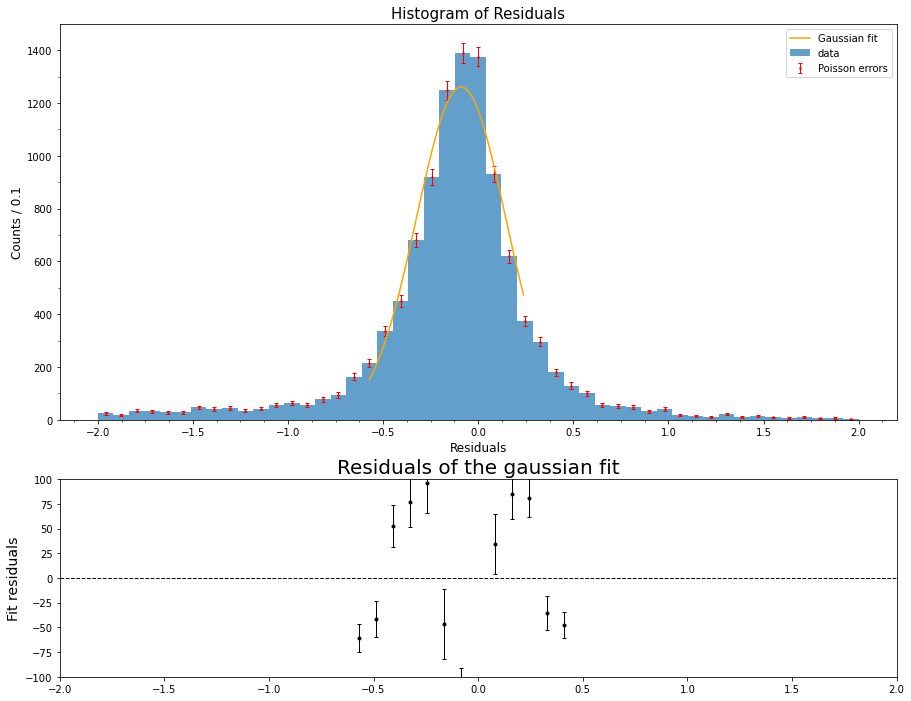

In [19]:
filename = 'residuals_261.pkl'

#opening the pickle file
infile = open(filename, 'rb')
new_dict = pickle.load(infile)
infile.close()
#converting the pickle in dictionary
dictionary = dict(new_dict.item())
#converting dictionary to dataframe
res = pd.DataFrame(dictionary)


#creating figure and axis
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(15,12))
gs = GridSpec(2, 1, height_ratios=[2, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])


#choosing binning and creating the histo
binx = np.linspace(-2.,2.,50)
histo,n,_ = ax1.hist(res['residuals'], bins = binx, range=(-2,2), label = "data", alpha = 0.7)

#creating the array of binning centers 
x = (binx[1:] + binx[:-1])/2
width = binx[1] - binx[0]

#setting label 
ax1.set_ylabel(f'Counts / {width:.1f}', size = 12)
ax1.set_xlabel('Residuals', size = 12)
ax1.xaxis.set_minor_locator(AutoMinorLocator(4))
ax1.yaxis.set_minor_locator(AutoMinorLocator(2))
ax1.set_title("Histogram of Residuals", size=15)

#setting Poisson errors
erry = np.sqrt(histo)
ax1.errorbar(
    x,
    histo,
    yerr = erry,
    marker = '.',markerfacecolor = 'r', markeredgecolor = 'r',markersize=3, lw = 0, ecolor='r', elinewidth=1, capsize=2,
    label = 'Poisson errors'
)

print('Looking at the data, I can fit them with a gaussian')

#fitting with gaussian
def gauss_function(x, a, x0, s):
    return a*np.exp(-(x-x0)**2/(2*s**2))

#finding the best parameters
param, cov = sc.optimize.curve_fit(f = gauss_function, xdata = x[17:30], ydata = histo[17:30], sigma = erry[17:30])
x_g = np.arange(x[17], x[27], 0.01)
ax1.plot(x_g, gauss_function(x_g, *param), label = 'Gaussian fit', linestyle = '-', color = 'orange')
ax1.legend()

#getting the parameters of the gaussian fit
print('\n The parameters of the fit are: \n mu =', param[1], '\n sigma =', param[2])


#computing residuals
res = gauss_function(x,*param) - histo

fitResiduals = res[17:30]
fitX = x[17:30]
fitErrors = erry[17:30]

ax2.errorbar(fitX, fitResiduals, yerr = fitErrors, marker = '.', linewidth = 0, elinewidth= 1 , color = 'black', label = 'Residuals',capsize=2)
ax2.axhline(color = 'black', linewidth = 1, linestyle = '--')
ax2.set_ylim( bottom = -100, top = 100)
ax2.set_xlim( -2, 2)
ax2.set_ylabel('Fit residuals', fontsize = 14) 
ax2.set_title('Residuals of the gaussian fit', fontsize = 20)


4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012. OK

   - What are the best-fit values of the parameters? OK

   - What is the overall average temperature in Munich OK, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$? OK
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

The best fit parameters for f(x) are:
 amplitude: -9.988133661428728 
 shift -0.23334760558929407  
 traslation 9.38411486824205

 The best fit parameters for g(x) are:
 amplitude: -9.98225024669981 
 pulse 1.0014435065175635 
 shift -31.030506989516436  
 traslation 9.398119591830584

 b parameter is a shift on years axis corresponding to the fact that the measurements could not be performed at same time every year, but there could be an anticipation or a delay each year.

 The overall average temperature in Munich is 9.4 celsius

Daily average values for the coldest time during the year: -0.6  celsius

Daily average values for the hottest time during the year: 19.4  celsius

RSS of first function: 34359.85859996421 
RSS of second function: 34352.79405724193

Additional parameter is not needed since CL = 0.5841999285718924 .


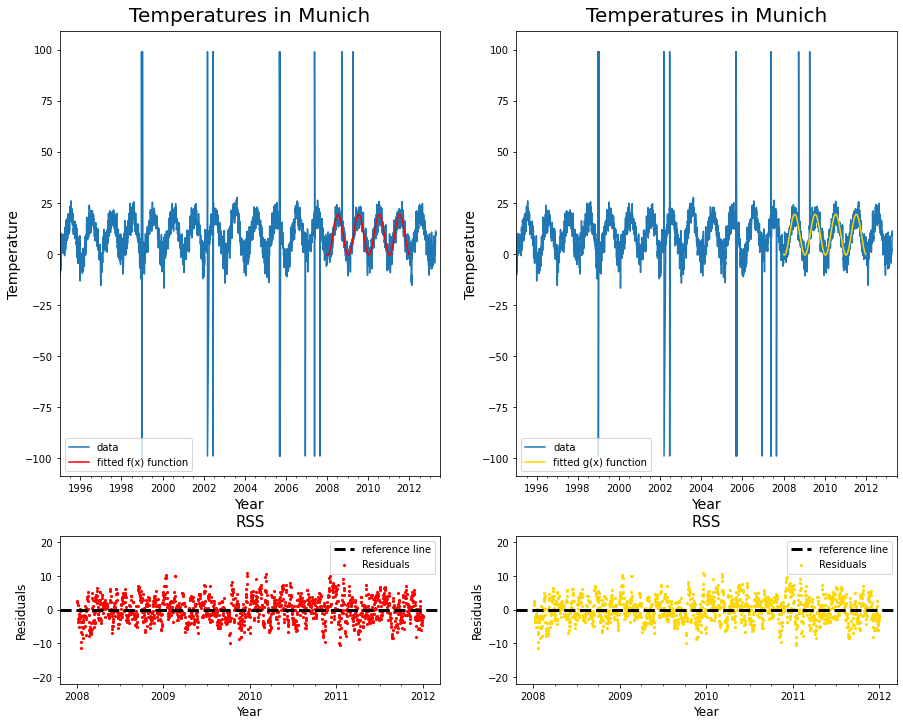

In [34]:
#downloading the file (only once then I can comment this line to avoid downloading the file several times)
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P /

#opening the txt file with data
data = pd.read_csv('munich_temperatures_average_with_bad_data.txt', sep=" ", header=None)
data.columns = ["year", "temperature"]
data = data.dropna(how='all')
#!cat munich_temperatures_average_with_bad_data.txt

#creating figure and subplots
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(15,12))
gs = GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[3, 1])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])
ax4 = fig.add_subplot(gs[3])


#setting features for the plot
ax1.set_xlim(1995, 2013.5)
ax1.xaxis.set_major_locator(MultipleLocator(2))
ax1.xaxis.set_minor_locator(AutoMinorLocator(4))
ax1.set_xlabel("Year", fontsize = 14)
ax1.set_ylabel("Temperature", fontsize = 14)
ax1.set_title("Temperatures in Munich", fontsize=20, verticalalignment='bottom')
ax1.plot(data['year'], data['temperature'], label = 'data')

ax2.set_xlim(1995, 2013.5)
ax2.xaxis.set_major_locator(MultipleLocator(2))
ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
ax2.set_xlabel("Year", fontsize = 14)
ax2.set_ylabel("Temperature", fontsize = 14)
ax2.set_title("Temperatures in Munich", fontsize=20, verticalalignment='bottom')
ax2.plot(data['year'], data['temperature'], label = 'data')

#defining f(x) function -> first function to fit with
def f(x, a, b,c):
    return a * np.cos(2*math.pi*x + b) + c
#defining g(x) function -> second function to set with
def g(x, a, b,c,d):
    return a * np.cos(2*math.pi*x*b + c) + d

#range of the fit
data = data[data['year']>2008]
data = data[data['year']<2012]

#making the fit with f(x) and plotting it
popt1, pcov1 = sc.optimize.curve_fit(f, data['year'], data['temperature'], p0=[25,1,1], full_output=False)
ax1.plot(data['year'], f(data['year'], popt1[0], popt1[1], popt1[2]), label='fitted f(x) function', color = 'red')

ax1.legend()

#making the fit with g(x) and plotting it
popt2, pcov2 = sc.optimize.curve_fit(g, data['year'], data['temperature'], p0=[25,1,1,1], full_output=False)
ax2.plot(data['year'], g(data['year'], popt2[0], popt2[1], popt2[2], popt2[3]), label='fitted g(x) function', color = 'gold')
ax2.legend()


#getting the parameters
print("The best fit parameters for f(x) are:\n", "amplitude:", popt1[0],"\n shift" ,popt1[1], " \n traslation",popt1[2])
print("\n The best fit parameters for g(x) are:\n", "amplitude:", popt2[0],"\n pulse", popt2[1],"\n shift" ,popt2[2], " \n traslation",popt2[3])
print('\n b parameter is a shift on years axis corresponding to the fact that the measurements could not be performed at same time every year, but there could be an anticipation or a delay each year.')

#getting the average of temperatures
average = data['temperature'].mean()
print("\n The overall average temperature in Munich is", round(average,1), "celsius")
aver_min = f(data['year'], *popt1).min()
print('\nDaily average values for the coldest time during the year:',round(aver_min,1),' celsius')
aver_max = f(data['year'], *popt1).max()
print('\nDaily average values for the hottest time during the year:',round(aver_max,1),' celsius')


#Computing and printing RSS

res_f = f(data['year'],*popt1) - data['temperature']
ax3.scatter(data['year'], res_f, marker = 'o', lw = 0, color = 'red', label = 'Residuals', s = 10)
ax3.axhline(color = 'black', linewidth = 3, linestyle = 'dashed', label = 'reference line')
ax3.set_ylim( bottom = -22, top = 22)
ax3.set_ylabel('Residuals', fontsize = 12) 
ax3.set_xlabel('Year', fontsize = 12)
ax3.xaxis.set_major_locator(MultipleLocator(1))
ax3.xaxis.set_minor_locator(AutoMinorLocator(4))
ax3.set_title("RSS", fontsize=15, verticalalignment='bottom')
ax3.legend()

res_g = g(data['year'],*popt2) - data['temperature']
ax4.scatter(data['year'], res_g, marker = 'o', lw = 0, color = 'gold', label = 'Residuals', s = 10)
ax4.axhline(color = 'black', linewidth = 3, linestyle = 'dashed', label = 'reference line')
ax4.set_ylim( bottom = -22, top = 22)
ax4.set_ylabel('Residuals', fontsize = 12) 
ax4.set_xlabel('Year', fontsize = 12)
ax4.xaxis.set_major_locator(MultipleLocator(1))
ax4.xaxis.set_minor_locator(AutoMinorLocator(4))
ax4.set_title("RSS", fontsize=15, verticalalignment='bottom')
ax4.legend()


RSS1 = np.sum(res_f**2)
RSS2 = np.sum(res_g**2)
print('\nRSS of first function:', RSS1, '\nRSS of second function:',RSS2)


#Defining function for F-test

from scipy.stats import f

def Ftest(rss1, rss2, dof1, dof2, bins):
    fValue = ((rss1 - rss2)/(dof2 - dof1)) / (rss2/(bins - dof2))
    return 1. - f.cdf(fValue, dof2 - dof1, bins - dof2)

N = len(data['year'])

y1 = f(data['year'], *popt1)
y2 = g(data['year'], *popt2)

#Calling the F test and performing it to f(x) and g(x)
CL = Ftest(RSS1, RSS2, 3, 4, N)

if CL < 0.1:
    print ('\nAdditional parameter is needed since CL =',CL,'.')
else:
    print('\nAdditional parameter is not needed since CL =',CL,'.')
